In [66]:
from ray.rllib.agents.ppo import PPOTrainer
import numpy as np

import industrial_benchmarks_train as ibt
import pandas as pd
import matplotlib.pyplot as plt

# Create Agent

In [67]:
ibt.config["num_workers"] = 1
agent = PPOTrainer(config=ibt.config, env="IBGym-v1")
agent.restore(
    "tmp/ray_exp_logs/industrial_benchmark/PPOTrainer_IBGym-v1_4dae4_00000_0_2022-08-01_14-56-05/checkpoint_000145/checkpoint-145")
env = ibt.env_creator('')

2022-08-01 18:09:20,012	WARNING trainer.py:2540 -- You have specified 3 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
(RolloutWorker pid=213702) /home/hamza/PycharmProjects/StateCompression/venv/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
(RolloutWorker pid=213702)   logger.warn(
(RolloutWorker pid=213702) 2022-08-01 18:09:24,511	WARNING env.py:135 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.


(RolloutWorker pid=213702) Model: "model_1"
(RolloutWorker pid=213702) __________________________________________________________________________________________________
(RolloutWorker pid=213702)  Layer (type)                   Output Shape         Param #     Connected to                     
(RolloutWorker pid=213702) ==================================================================================================
(RolloutWorker pid=213702)  inputs (InputLayer)            [(None, None, 32)]   0           []                               
(RolloutWorker pid=213702)                                                                                                   
(RolloutWorker pid=213702)  dense (Dense)                  (None, None, 128)    4224        ['inputs[0][0]']                 
(RolloutWorker pid=213702)                                                                                                   
(RolloutWorker pid=213702)  memory_in_0 (InputLayer)       [(None, None, 1

2022-08-01 18:09:36,490	WARNING deprecation.py:46 -- DeprecationWarning: `simple_optimizer` has been deprecated. This will raise an error in the future!
2022-08-01 18:09:36,490	WARNING trainer.py:2540 -- You have specified 3 evaluation workers, but your `evaluation_interval` is None! Therefore, evaluation will not occur automatically with each call to `Trainer.train()`. Instead, you will have to call `Trainer.evaluate()` manually in order to trigger an evaluation run.
2022-08-01 18:09:36,557	INFO trainable.py:159 -- Trainable.setup took 16.547 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2022-08-01 18:09:36,559	WARNING util.py:65 -- Install gputil for GPU system monitoring.
2022-08-01 18:09:36,990	INFO trainable.py:588 -- Restored on 192.168.0.185 from checkpoint: tmp/ray_exp_logs/industrial_benchmark/PPOTrainer_IBGym-v1_4dae4_00000_0_2022-08-01_14-56-05/checkpoint_000145/checkpoint-145
2022-08-01 18:09:36,991	

# Test Function

In [80]:
def test(time_steps= 1000):
    inference_data = {"gain": [], "velocity": [], "shift": []}
    episode_reward = 0
    done = False
    obs = env.reset()
    state = []
    use_lstm = ibt.config["model"]["use_lstm"]
    use_attention = ibt.config["model"]["use_attention"]
    if use_lstm:
        cell_size = ibt.config["model"]["lstm_cell_size"]
        state = [np.zeros(cell_size, np.float32),
                 np.zeros(cell_size, np.float32)]
    if use_attention:
        num_transformers = ibt.config["model"]["attention_num_transformer_units"]
        attention_dim = ibt.config["model"]["attention_dim"]
        memory = 50  # ibt.config["model"]["attention_memory_inference"]
        state = [
            np.zeros([memory, attention_dim], np.float32)
            for _ in range(num_transformers)
        ]
    i=0
    while i < time_steps:
        # inference_data["obs"].extend(obs)
        inference_data["gain"].append(obs[2])
        inference_data["velocity"].append(obs[1])
        inference_data["shift"].append(obs[3])
        action, state_out, _ = agent.compute_action(obs, state,unsquash_action=True, clip_action=True, explore=False)
        obs, reward, done, info = env.step(action)
        print(reward)
        # inference_data["action"].extend(action)
        # inference_data["reward"].append(reward)
        episode_reward += reward

        if use_attention:
            state = [
                np.concatenate([state[i], [state_out[i]]], axis=0)[1:]
                for i in range(num_transformers)
            ]
        i=i+1

    print(f"Average Reward: {episode_reward/time_steps}")
    return inference_data

# Plot Function

In [81]:
def plot_inf_data(inference_data):
    df = pd.DataFrame(inference_data)
    plt.plot(df['gain'])
    plt.legend("gain")
    plt.figure(figsize = (20, 8), dpi = 800)
    plt.show()
    plt.plot(df['velocity'])
    plt.legend("velocity")
    plt.figure(figsize = (20, 8), dpi = 800)
    plt.show()
    plt.plot(df['shift'])
    plt.legend("shift")
    plt.figure(figsize = (20, 8), dpi = 800)
    plt.show()

# Create test data and plot

-196.7320212930536
-195.3929082261817
-218.0971618659185
-219.484164556242
-229.70322923299332
-254.9138816170999
-248.65170872413282
-206.59415118239613
-200.34776335784528
-245.00342138305342
-210.12678390888703
-214.4743149963654
-183.44486073608772
-225.9564773914811
-226.504961944206
-182.6010367273993
-201.1319216512858
-179.91724821744012
-190.1927278131493
-172.07578802921984
-184.3146806365012
-180.76481719400192
-171.9597278524492
-243.0893220645171
-179.8783677117563
-226.6544676955515
-174.4593669359964
-179.6473893959762
-228.19408583334285
-170.49961689207578
-172.25164264780722
-176.45352785514922
-183.35139688702048
-170.2233239545215
-177.34844269564638
-180.3921193378808
-197.93396449205903
-167.23382842454427
-165.9278201282666
-149.5022798675692
-158.3400684294631
-148.2273525747791
-143.18190042331287
-150.43106508517485
-167.59937649750023
-195.3453176228901
-168.35336077890963
-165.42563950071042
-173.312907483631
-191.88140954128477
-204.04717202295473
-172.0924

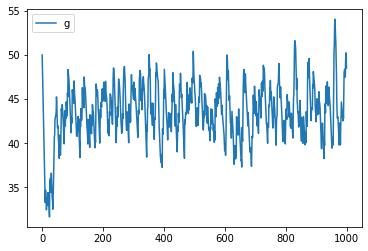

<Figure size 16000x6400 with 0 Axes>

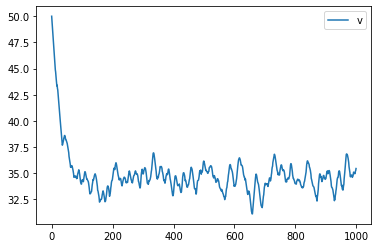

<Figure size 16000x6400 with 0 Axes>

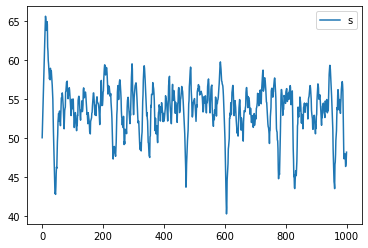

<Figure size 16000x6400 with 0 Axes>

In [82]:
inference_data = test(1000)

plot_inf_data(inference_data)